In [1]:
%load_ext autoreload
%autoreload 2

## **Exercice 2 - Introduction à l’identification de paramètres de modèle de comportement**

Pour réaliser cette exercice, qui constitue la première partie du TD noté sous forme de DM, il vous faut suivre le tutoriel d’installation et d’utilisation du logiciel qui vous a été fourni. Il va vous permettre de simuler sur la base d’un calcul éléments finis à un seul élément des essais de traction, traction compression et relaxation. L’objectif de ce premier exercice est de vous familiariser avec l’utilisation du logiciel et surtout de mieux comprendre comment il est possible d’orienter un calcul en identifiant au mieux le modèle de comportement choisi. En effet, le même modèle (les mêmes équations pour modéliser le comportement) avec une identification spécifique peut vous mener à des résultats très différents en termes de réponse mécanique. L’ensemble des données expérimentales et/ou simulé seront accessible et visualisé grâce au logiciel Veusz que vous avez normalement téléchargé et installé et qui va vous permettre de comparer les résultats expérimentaux et le résultat de vos simulations. Vous pouvez vous référer à la courte fiche d’explication pour vous aider !

Pour cette exercice, l’ensemble des données qui vous sont fournis ont été générées avec un modèle donnée. L’objectif est tout autant de découvrir l’utilisation du logiciel et l’effet de chacun des paramètres du modèles que de retrouver les paramètres et le modèle utilisé pour générer ces données!

### **2.1 Autour de l’essai de traction**

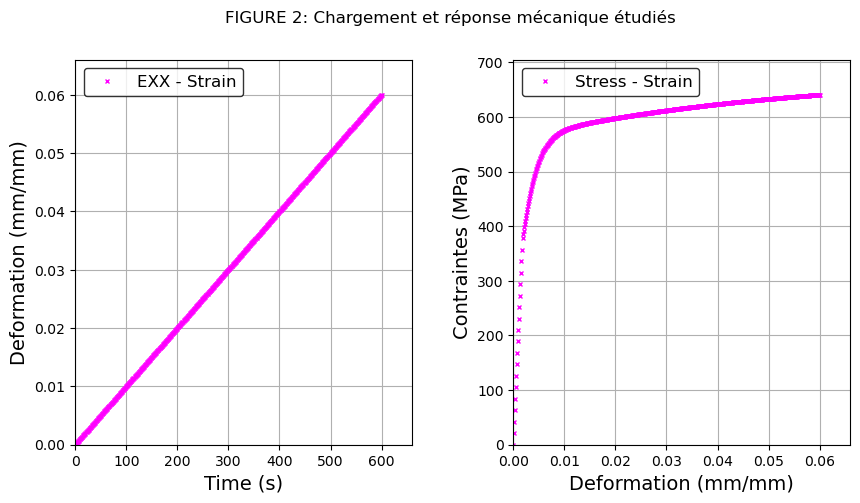

In [2]:
from src.code.functions import draw_data
draw_data(input_data = "data/data_traction1_ex2.csv", figure_title = 'FIGURE 2: Chargement et réponse mécanique étudiés')

Les données expérimentales qui vous sont fournies et qui sont visualisables dans le fichier **Veusz** fourni à la page intitulé **Ex2 : Première traction**. Il s’agit ici d’un essai de traction **piloté en déformation en 0 et 0,06mm/mm soit 6%.**

### **Les questions**

#### *Exercise 2 : Première traction - Q1*

1. Estimez tout d’abord la valeur du module d’Young en considérant les premiers points expérimentaux dans le régime linéaire. Comme vous avez ici accès à des essais simulés, il n’y a pas de bruit et vous devez donc trouver une valeur juste.

<ins>**Votre commentaire**</ins>






#### *Exercise 2 : Première traction - Q2*

2. Simulez l’essai avec un modèle de type écrouissage cinématique linéaire : faites varier la limite d’élasticité et le module d’écrouissage. Quel est le meilleur compromis que vous pouvez obtenir avec ce modèle ?

In [3]:
#########################################################################
### Simulation d'un essai de traction - écrouissage cinématique  linéaire 
#########################################################################

from src.code.models import lk

model_dict = {
  "material_property" : {
    "YoungModulus" : 20000,
    "PoissonRatio" : 0.3,
    "R0" : 1000,
    "C" : 1000
  },
  "output" : {
    "filename" : "sim_results/traction_ex2.1_q2.txt"
  },
  "external_state_variable" : {
    "Temperature" : 293.15
  },
  "time" : {
    "start_time" : 0.0,
    "end_time" : 600,
    "step_time": 1
  },
  "load" : {
    "method" : "strain",
    "direction" : "EXX",
    "loading_blocks" : {
        2 : {
            "time" : 600,
            "load" : 0.06,
        },
        1 : {
            "time" : 0.0,
            "load" : 0.0,
        }
    }
  }
}

lk_instance = lk(model_input_file = model_dict, 
                 behavior_name = 'asterlinearkinematic')
lk_instance.print_input()
lk_instance.run_simulation()
data_lk = lk_instance.print_output()

Input file loaded successfully.
Checking if all required fields are present...
{'external_state_variable': {'Temperature': 293.15},
 'load': {'direction': 'EXX',
          'loading_blocks': {1: {'load': 0.0, 'time': 0.0},
                             2: {'load': 0.06, 'time': 600}},
          'method': 'strain'},
 'material_property': {'C': 1000,
                       'PoissonRatio': 0.3,
                       'R0': 1000,
                       'YoungModulus': 20000},
 'output': {'filename': 'sim_results/traction_ex2.1_q2.txt'},
 'time': {'end_time': 600, 'start_time': 0.0, 'step_time': 1}}


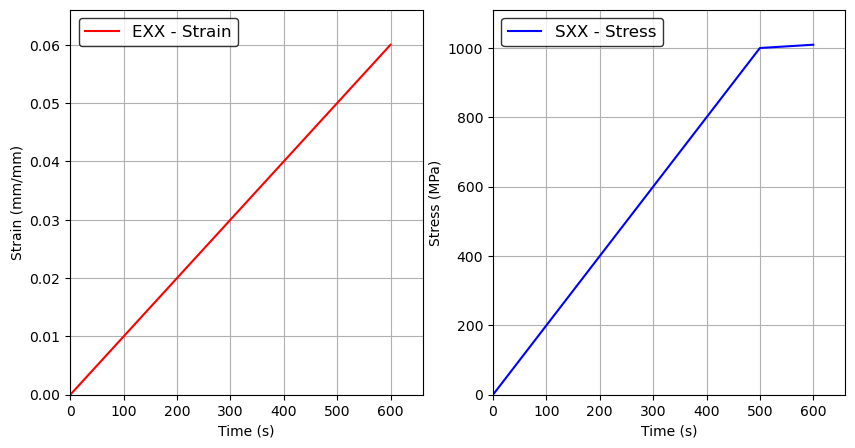

In [4]:
lk_instance.graph_e_and_sigma_time(data_lk)

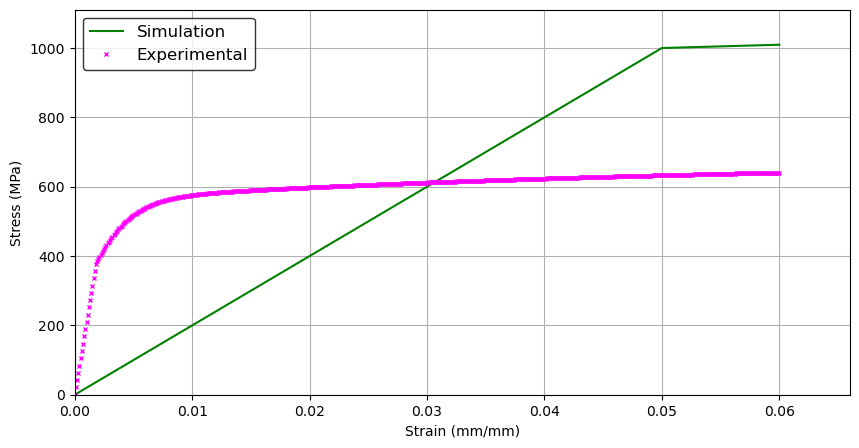

In [5]:
lk_instance.graph_e_and_sigma(dataframe = data_lk, 
                              input_data = "data/data_traction1_ex2.csv", 
                              savefig_name = "sim_results/traction_ex2.1_q2.png")

#### *Exercise 2 : Première traction - Q3*

3. Simulez l’essai avec un modèle de type écrouissage cinématique non linéaire : faites varier la limite d’élasticité, le module d’écrouissage et le terme de rappel. Quel est le meilleur compromis que vous pouvez obtenir avec ce modèle ?

In [6]:
#########################################################################
### Simulation d'un essai de traction - écrouissage cinématique non linéaire
#########################################################################

from src.code.models import lk

model_dict = {
  "material_property" : {
    "YoungModulus" : 20000,
    "PoissonRatio" : 0.3,
    "R0" : 10000,
    "C[0]" : 1000,
    "D_alpha[0]" : 1000.,
    "Q" : 0,
    "b" : 0,
    "C[1]" : 0,
    "D_alpha[1]" : 0
  },
  "output" : {
    "filename" : "sim_results/traction_ex2.1_q3.txt"
  },
  "external_state_variable" : {
    "Temperature" : 293.15
  },
  "time" : {
    "start_time" : 0.0,
    "end_time" : 600,
    "step_time": 1
  },
  "load" : {
    "method" : "strain",
    "direction" : "EXX",
    "loading_blocks" : {
        2 : {
            "time" : 600,
            "load" : 0.06,
        },
        1 : {
            "time" : 0.0,
            "load" : 0.0,
        }
    }
  }
}

nlk_instance = lk(model_input_file = model_dict, 
                 behavior_name = 'asternonlinearisotropicnonlinearkinematic')
nlk_instance.print_input()
nlk_instance.run_simulation()
data_nlk = nlk_instance.print_output()

Input file loaded successfully.
Checking if all required fields are present...
{'external_state_variable': {'Temperature': 293.15},
 'load': {'direction': 'EXX',
          'loading_blocks': {1: {'load': 0.0, 'time': 0.0},
                             2: {'load': 0.06, 'time': 600}},
          'method': 'strain'},
 'material_property': {'C[0]': 1000,
                       'C[1]': 0,
                       'D_alpha[0]': 1000.0,
                       'D_alpha[1]': 0,
                       'PoissonRatio': 0.3,
                       'Q': 0,
                       'R0': 10000,
                       'YoungModulus': 20000,
                       'b': 0},
 'output': {'filename': 'sim_results/traction_ex2.1_q3.txt'},
 'time': {'end_time': 600, 'start_time': 0.0, 'step_time': 1}}


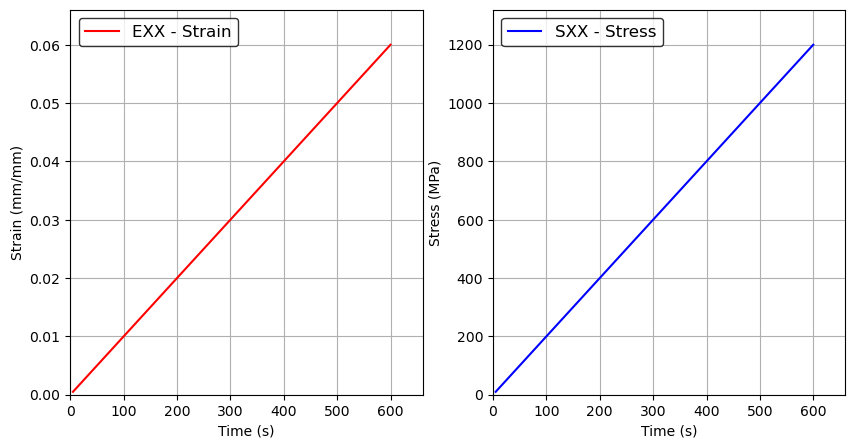

In [7]:
nlk_instance.graph_e_and_sigma_time(data_nlk)

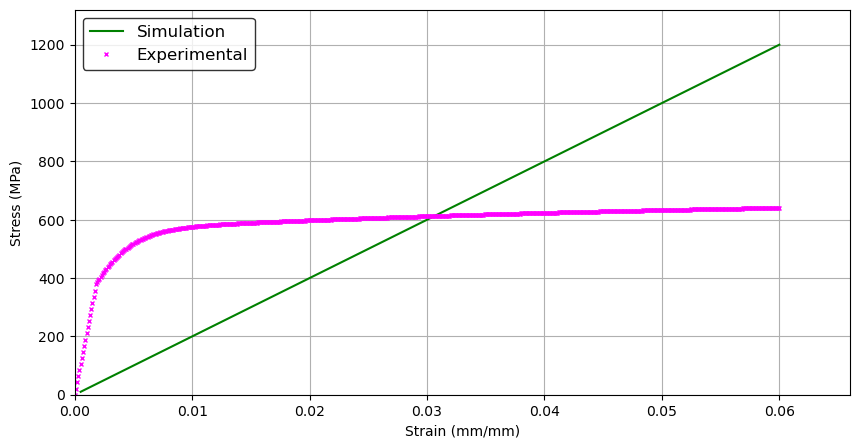

In [8]:
nlk_instance.graph_e_and_sigma(dataframe = data_nlk, 
                               input_data = "data/data_traction1_ex2.csv", 
                               savefig_name = "sim_results/traction_ex2.1_q3.png")

#### *Exercise 2 : Première traction - Q4*

4. Simulez l’essai avec un modèle de type écrouissage isotrope linéaire : faites varier la limite d’élasticité et la constante de durcissement. Quel est le meilleur compromis que vous pouvez obtenir avec ce modèle ? Quelle différences obtenez-vous avec un modèle cinématique ?


In [9]:
#########################################################################
### Simulation d'un essai de traction - écrouissage isotrope linéaire
#########################################################################

from src.code.models import lk

model_dict = {
  "material_property" : {
    "YoungModulus" : 20000,
    "PoissonRatio" : 0.3,
    "R0" : 10000,
    "K" : 1000,
  },
  "output" : {
    "filename" : "sim_results/traction_ex2.1_q4.txt"
  },
  "external_state_variable" : {
    "Temperature" : 293.15
  },
  "time" : {
    "start_time" : 0.0,
    "end_time" : 600,
    "step_time": 1
  },
  "load" : {
    "method" : "strain",
    "direction" : "EXX",
    "loading_blocks" : {
        2 : {
            "time" : 600,
            "load" : 0.06,
        },
        1 : {
            "time" : 0.0,
            "load" : 0.0,
        }
    }
  }
}

li_instance = lk(model_input_file = model_dict, 
                 behavior_name = 'asterlinearisotropic')
li_instance.print_input()
li_instance.run_simulation()
data_li = li_instance.print_output()

Input file loaded successfully.
Checking if all required fields are present...
{'external_state_variable': {'Temperature': 293.15},
 'load': {'direction': 'EXX',
          'loading_blocks': {1: {'load': 0.0, 'time': 0.0},
                             2: {'load': 0.06, 'time': 600}},
          'method': 'strain'},
 'material_property': {'K': 1000,
                       'PoissonRatio': 0.3,
                       'R0': 10000,
                       'YoungModulus': 20000},
 'output': {'filename': 'sim_results/traction_ex2.1_q4.txt'},
 'time': {'end_time': 600, 'start_time': 0.0, 'step_time': 1}}


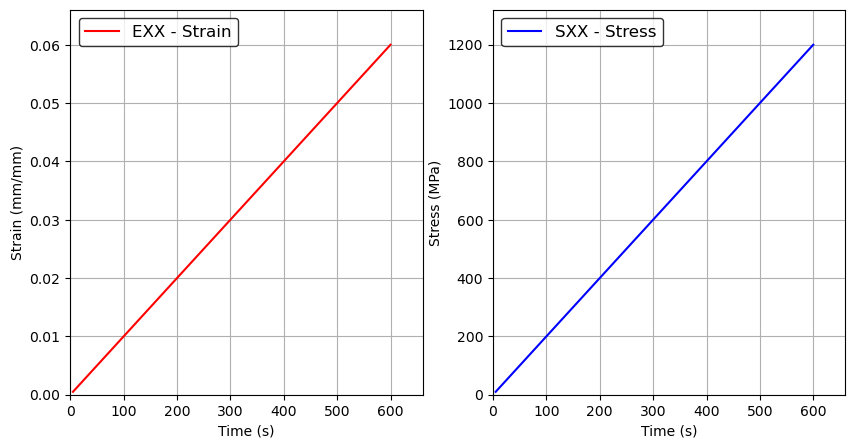

In [10]:
li_instance.graph_e_and_sigma_time(data_li)

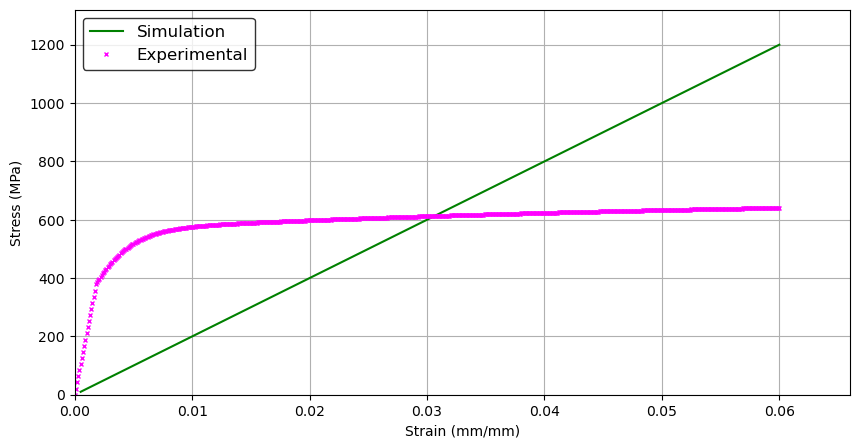

In [11]:
li_instance.graph_e_and_sigma(dataframe = data_li, 
                              input_data = "data/data_traction1_ex2.csv", 
                              savefig_name = "sim_results/traction_ex2.1_q4.png")

#### *Exercise 2 : Première traction - Q5*

5. Simulez l’essai avec un modèle de type écrouissage isotrope non linéaire : faites varier la limite d’élasticité, la constante de durcissement et le terme de rappel. Quel est le meilleur compromis que vous pouvez obtenir avec ce modèle ?

In [12]:
#########################################################################
### Simulation d'un essai de traction - écrouissage isotrope non linéaire
#########################################################################

from src.code.models import lk

model_dict = {
  "material_property" : {
    "YoungModulus" : 20000,
    "PoissonRatio" : 0.3,
    "R0" : 10000,
    "Q" : 1000,
    "b" : 1.,
    "C[0]" : 0,
    "C[1]" : 0,
    'D_alpha[0]': 0,
    'D_alpha[1]': 0
  },
  "output" : {
    "filename" : "sim_results/traction_ex2.1_q5.txt"
  },
  "external_state_variable" : {
    "Temperature" : 293.15
  },
  "time" : {
    "start_time" : 0.0,
    "end_time" : 600,
    "step_time": 1
  },
  "load" : {
    "method" : "strain",
    "direction" : "EXX",
    "loading_blocks" : {
        2 : {
            "time" : 600,
            "load" : 0.06,
        },
        1 : {
            "time" : 0.0,
            "load" : 0.0,
        }
    }
  }
}

nli_instance = lk(model_input_file = model_dict, 
                 behavior_name = 'asternonlinearisotropicnonlinearkinematic')
nli_instance.print_input()
nli_instance.run_simulation()
data_nli = nli_instance.print_output()

Input file loaded successfully.
Checking if all required fields are present...
{'external_state_variable': {'Temperature': 293.15},
 'load': {'direction': 'EXX',
          'loading_blocks': {1: {'load': 0.0, 'time': 0.0},
                             2: {'load': 0.06, 'time': 600}},
          'method': 'strain'},
 'material_property': {'C[0]': 0,
                       'C[1]': 0,
                       'D_alpha[0]': 0,
                       'D_alpha[1]': 0,
                       'PoissonRatio': 0.3,
                       'Q': 1000,
                       'R0': 10000,
                       'YoungModulus': 20000,
                       'b': 1.0},
 'output': {'filename': 'sim_results/traction_ex2.1_q5.txt'},
 'time': {'end_time': 600, 'start_time': 0.0, 'step_time': 1}}


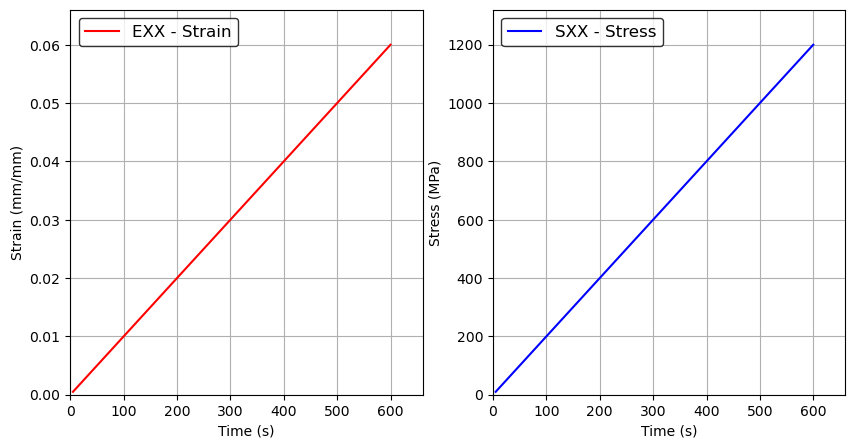

In [13]:
nli_instance.graph_e_and_sigma_time(data_nli)

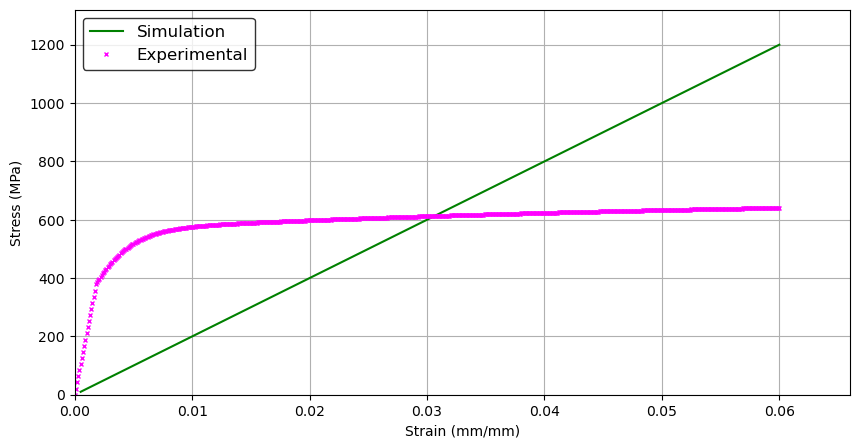

In [14]:
nli_instance.graph_e_and_sigma(dataframe = data_nli, 
                               input_data = "data/data_traction1_ex2.csv", 
                               savefig_name = "sim_results/traction_ex2.1_q5.png")

#### *Exercise 2 : Première traction - Q6*

6. À l’aide de vos premières observations, essayez de trouvez le meilleur compromis en mixant les écrouissages. Que pouvez-vous en conclure sur l’identification de paramètre à partir d’un essai de traction ?

***Hint - Vous pouvez même utilisé des modèle linéaires!***

In [15]:
#########################################################################
### Simulation d'un essai de traction - 
### écrouissage cinématique non linéaire combiné avec un écrouissage 
### isotrope non linéaire
#########################################################################

from src.code.models import lk

model_dict = {
  "material_property" : {
    "YoungModulus" : 200000,
    "PoissonRatio" : 0.3,
    "R0" : 10000,
    "Q" : 1000,
    "b" : 1.,
    "C[0]" : 1000,
    "C[1]" : 0,
    'D_alpha[0]': 1000,
    'D_alpha[1]': 0
  },
  "output" : {
    "filename" : "sim_results/traction_ex2.1_q6.txt"
  },
  "external_state_variable" : {
    "Temperature" : 293.15
  },
  "time" : {
    "start_time" : 0.0,
    "end_time" : 600,
    "step_time": 1
  },
  "load" : {
    "method" : "strain",
    "direction" : "EXX",
    "loading_blocks" : {
        2 : {
            "time" : 600,
            "load" : 0.06,
        },
        1 : {
            "time" : 0.0,
            "load" : 0.0,
        }
    }
  }
}

mixed_instance = lk(model_input_file = model_dict, 
                 behavior_name = 'asternonlinearisotropicnonlinearkinematic')
mixed_instance.print_input()
mixed_instance.run_simulation()
data_mixed = mixed_instance.print_output()

Input file loaded successfully.
Checking if all required fields are present...
{'external_state_variable': {'Temperature': 293.15},
 'load': {'direction': 'EXX',
          'loading_blocks': {1: {'load': 0.0, 'time': 0.0},
                             2: {'load': 0.06, 'time': 600}},
          'method': 'strain'},
 'material_property': {'C[0]': 1000,
                       'C[1]': 0,
                       'D_alpha[0]': 1000,
                       'D_alpha[1]': 0,
                       'PoissonRatio': 0.3,
                       'Q': 1000,
                       'R0': 10000,
                       'YoungModulus': 200000,
                       'b': 1.0},
 'output': {'filename': 'sim_results/traction_ex2.1_q6.txt'},
 'time': {'end_time': 600, 'start_time': 0.0, 'step_time': 1}}


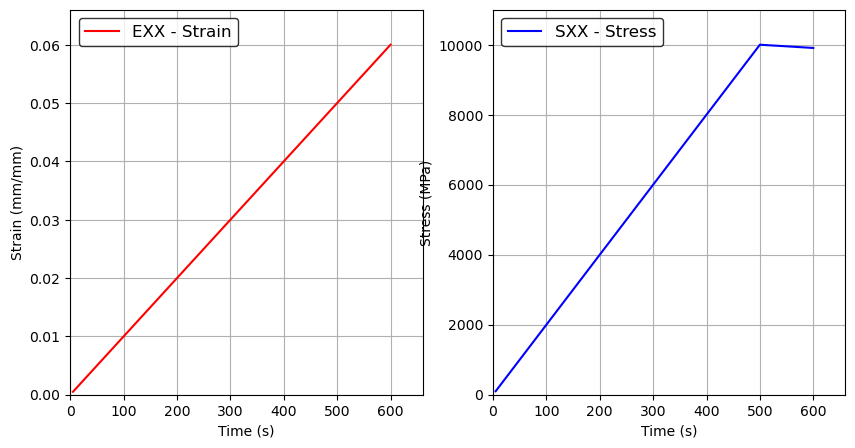

In [16]:
mixed_instance.graph_e_and_sigma_time(data_mixed)

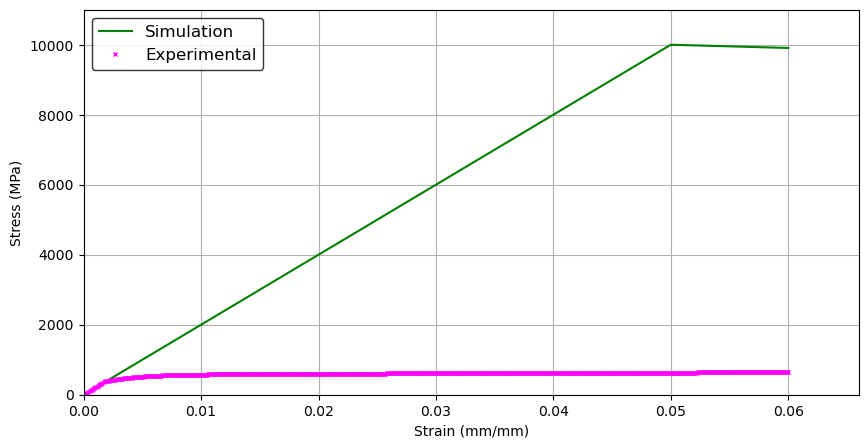

In [17]:
mixed_instance.graph_e_and_sigma(dataframe = data_mixed, 
                                 input_data = "data/data_traction1_ex2.csv", 
                                 savefig_name = "sim_results/traction_ex2.1_q6.png")

### **2.2 Autour d’un chargement cyclique**

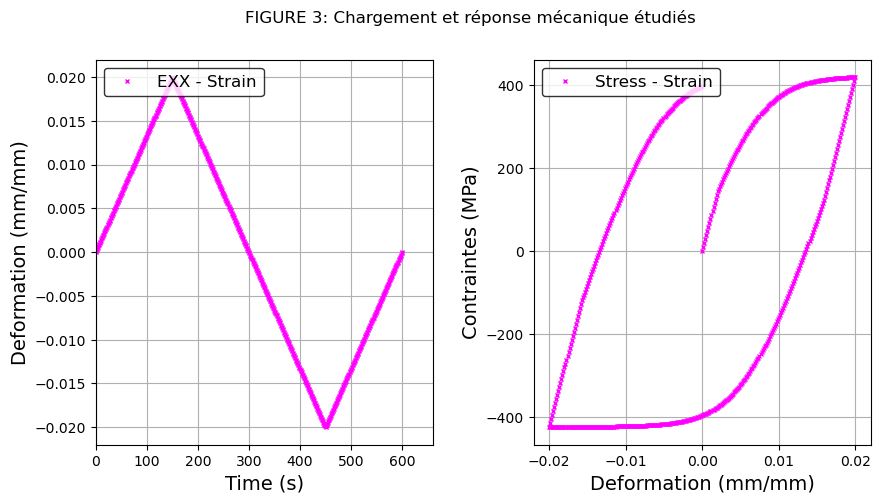

In [18]:
from src.code.functions import draw_data
draw_data(input_data = "data/data_cyclique1_ex2.csv", figure_title = 'FIGURE 3: Chargement et réponse mécanique étudiés')

Les données expérimentales qui vous sont fournies et qui sont visualisables dans le fichier **Veusz** fourni à la page intitulé **Ex2 : Chargement cyclique**. Il s’agit ici d’un cycle de traction compression **piloté en déformation entre -0,02 et 0,02 mm/mm soit une traction de 0 à 0,02 suivi d’une compression jusque -0,02 et enfin un retour à déformation nulle**.

### **Les questions**

#### *Exercise 2 : Chargement cyclique - Q1*

1. Estimez tout d’abord la valeur du module d’Young en considérant les premiers points expérimentaux dans le régime linéaire. Comme vous avez ici accès à des essais simulés, il n’y a pas de bruit et vous devez donc trouver une valeur juste.

<ins>**Votre commentaire**</ins>






#### *Exercise 2 : Chargement cyclique - Q2*

2. Simulez l’essai avec un modèle de type écrouissage cinématique linéaire : faites varier la limite d’élasticité et le module d’écrouissage. Quel est le meilleur compromis que vous pouvez obtenir avec ce modèle ?

In [19]:
#########################################################################
### Simulation d'un essai cyclique - écrouissage cinématique linéaire 
#########################################################################

from src.code.models import lk

model_dict = {
  "material_property" : {
    "YoungModulus" : 20000,
    "PoissonRatio" : 0.3,
    "R0" : 1000,
    "C" : 1000
  },
  "output" : {
    "filename" : "sim_results/cyclique_ex2.2_q2.txt"
  },
  "external_state_variable" : {
    "Temperature" : 293.15
  },
  "time" : {
    "start_time" : 0.0,
    "end_time" : 600,
    "step_time": 1
  },
  "load" : {
    "method" : "strain",
    "direction" : "EXX",
    "loading_blocks" : {
        4 : {
            "time" : 600,
            "load" : 0.0,
        },
        3 : {
            "time" : 450,
            "load" : -0.02,
        },
        2 : {
            "time" : 150,
            "load" : 0.02,
        },
        1 : {
            "time" : 0.0,
            "load" : 0.0,
        }
    }
  }
}

clk_instance = lk(model_input_file = model_dict, 
                 behavior_name = 'asterlinearkinematic')
clk_instance.print_input()
clk_instance.run_simulation()
data_clk = clk_instance.print_output()

Input file loaded successfully.
Checking if all required fields are present...
{'external_state_variable': {'Temperature': 293.15},
 'load': {'direction': 'EXX',
          'loading_blocks': {1: {'load': 0.0, 'time': 0.0},
                             2: {'load': 0.02, 'time': 150},
                             3: {'load': -0.02, 'time': 450},
                             4: {'load': 0.0, 'time': 600}},
          'method': 'strain'},
 'material_property': {'C': 1000,
                       'PoissonRatio': 0.3,
                       'R0': 1000,
                       'YoungModulus': 20000},
 'output': {'filename': 'sim_results/cyclique_ex2.2_q2.txt'},
 'time': {'end_time': 600, 'start_time': 0.0, 'step_time': 1}}


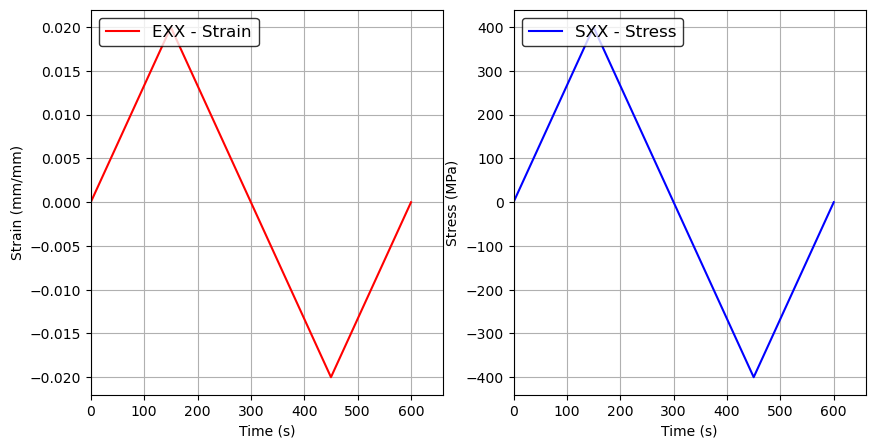

In [20]:
clk_instance.graph_e_and_sigma_time(data_clk)

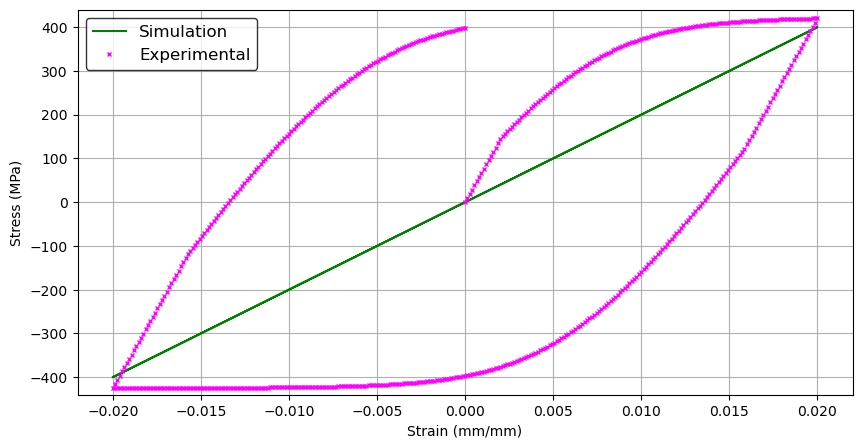

In [21]:
clk_instance.graph_e_and_sigma(dataframe = data_clk, 
                               input_data = "data/data_cyclique1_ex2.csv", 
                               savefig_name = "sim_results/cyclique_ex2.2_q2.png")

#### *Exercise 2 : Chargement cyclique - Q3*

3. Simulez l’essai avec un modèle de type écrouissage cinématique non linéaire : faites varier la limite d’élasticité, le module d’écrouissage et le terme de rappel. Quel est le meilleur compromis que vous pouvez obtenir avec ce modèle ?

In [22]:
#########################################################################
### Simulation d'un essai cyclique - écrouissage cinématique non linéaire
#########################################################################

from src.code.models import lk

model_dict = {
  "material_property" : {
    "YoungModulus" : 20000,
    "PoissonRatio" : 0.3,
    "R0" : 1000,
    "C[0]" : 1000,
    "D_alpha[0]" : 1000.,
    "Q" : 0,
    "b" : 0,
    "C[1]" : 0,
    "D_alpha[1]" : 0
  },
  "output" : {
    "filename" : "sim_results/cyclique_ex2.2_q3.txt"
  },
  "external_state_variable" : {
    "Temperature" : 293.15
  },
  "time" : {
    "start_time" : 0.0,
    "end_time" : 600,
    "step_time": 1
  },
  "load" : {
    "method" : "strain",
    "direction" : "EXX",
    "loading_blocks" : {
        4 : {
            "time" : 600,
            "load" : 0.0,
        },
        3 : {
            "time" : 450,
            "load" : -0.02,
        },
        2 : {
            "time" : 150,
            "load" : 0.02,
        },
        1 : {
            "time" : 0.0,
            "load" : 0.0,
        }
    }
  }
}

cnlk_instance = lk(model_input_file = model_dict, 
                 behavior_name = 'asternonlinearisotropicnonlinearkinematic')
cnlk_instance.print_input()
cnlk_instance.run_simulation()
data_cnlk = cnlk_instance.print_output()

Input file loaded successfully.
Checking if all required fields are present...
{'external_state_variable': {'Temperature': 293.15},
 'load': {'direction': 'EXX',
          'loading_blocks': {1: {'load': 0.0, 'time': 0.0},
                             2: {'load': 0.02, 'time': 150},
                             3: {'load': -0.02, 'time': 450},
                             4: {'load': 0.0, 'time': 600}},
          'method': 'strain'},
 'material_property': {'C[0]': 1000,
                       'C[1]': 0,
                       'D_alpha[0]': 1000.0,
                       'D_alpha[1]': 0,
                       'PoissonRatio': 0.3,
                       'Q': 0,
                       'R0': 1000,
                       'YoungModulus': 20000,
                       'b': 0},
 'output': {'filename': 'sim_results/cyclique_ex2.2_q3.txt'},
 'time': {'end_time': 600, 'start_time': 0.0, 'step_time': 1}}


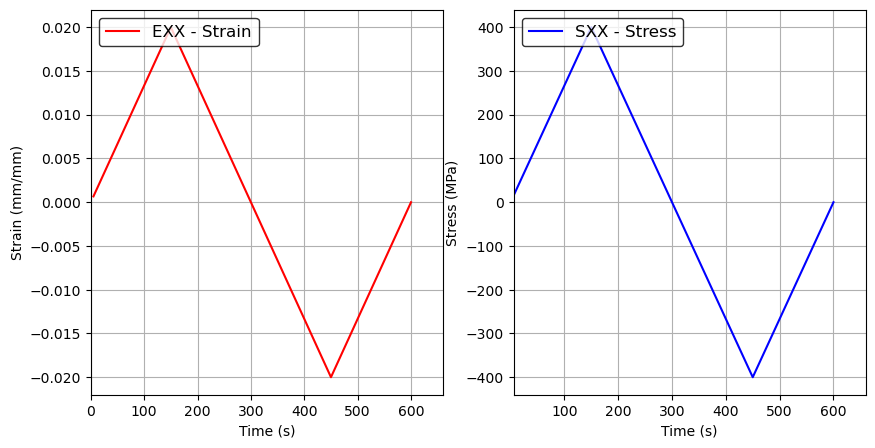

In [23]:
cnlk_instance.graph_e_and_sigma_time(data_cnlk)

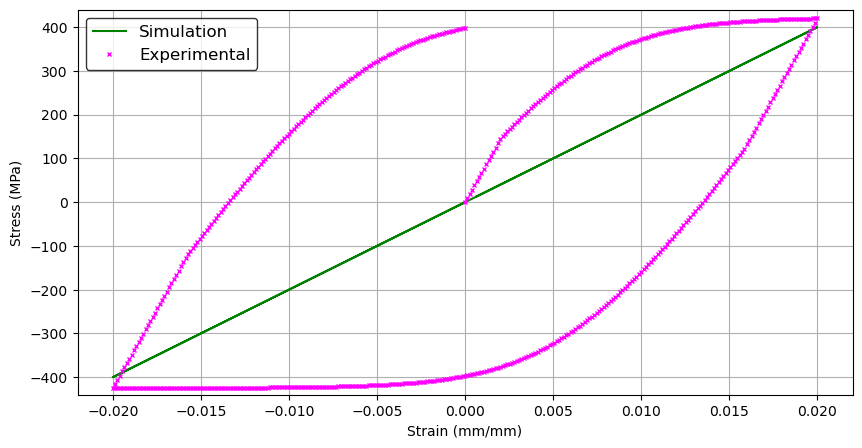

In [24]:
cnlk_instance.graph_e_and_sigma(dataframe = data_cnlk, 
                                input_data = "data/data_cyclique1_ex2.csv", 
                                savefig_name = "sim_results/cyclique_ex2.2_q3.png")

#### *Exercise 2 : Chargement cyclique - Q4*

4. Simulez l’essai avec un modèle de type écrouissage isotrope linéaire : faites varier la limite d’élasticité et la constante de durcissement. Quel est le meilleur compromis que vous pouvez obtenir avec ce modèle ? Quelle différences obtenez-vous avec un modèle cinématique ?

In [25]:
#########################################################################
### Simulation d'un essai cyclique - écrouissage isotrope linéaire
#########################################################################

from src.code.models import lk

model_dict = {
  "material_property" : {
    "YoungModulus" : 20000,
    "PoissonRatio" : 0.3,
    "R0" : 1000,
    "K" : 1000,
  },
  "output" : {
    "filename" : "sim_results/cyclique_ex2.2_q4.txt"
  },
  "external_state_variable" : {
    "Temperature" : 293.15
  },
  "time" : {
    "start_time" : 0.0,
    "end_time" : 600,
    "step_time": 1
  },
  "load" : {
    "method" : "strain",
    "direction" : "EXX",
    "loading_blocks" : {
        4 : {
            "time" : 600,
            "load" : 0.0,
        },
        3 : {
            "time" : 450,
            "load" : -0.02,
        },
        2 : {
            "time" : 150,
            "load" : 0.02,
        },
        1 : {
            "time" : 0.0,
            "load" : 0.0,
        }
    }
  }
}

cli_instance = lk(model_input_file = model_dict, 
                 behavior_name = 'asterlinearisotropic')
cli_instance.print_input()
cli_instance.run_simulation()
data_cli = cli_instance.print_output()

Input file loaded successfully.
Checking if all required fields are present...
{'external_state_variable': {'Temperature': 293.15},
 'load': {'direction': 'EXX',
          'loading_blocks': {1: {'load': 0.0, 'time': 0.0},
                             2: {'load': 0.02, 'time': 150},
                             3: {'load': -0.02, 'time': 450},
                             4: {'load': 0.0, 'time': 600}},
          'method': 'strain'},
 'material_property': {'K': 1000,
                       'PoissonRatio': 0.3,
                       'R0': 1000,
                       'YoungModulus': 20000},
 'output': {'filename': 'sim_results/cyclique_ex2.2_q4.txt'},
 'time': {'end_time': 600, 'start_time': 0.0, 'step_time': 1}}


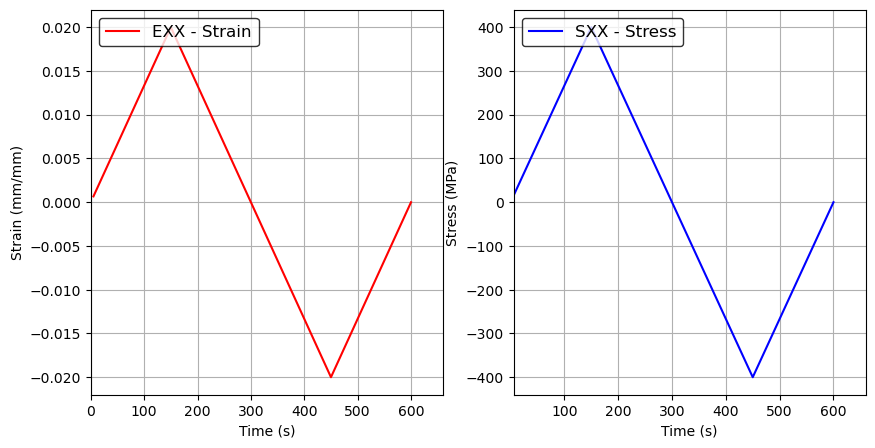

In [26]:
cli_instance.graph_e_and_sigma_time(data_cli)

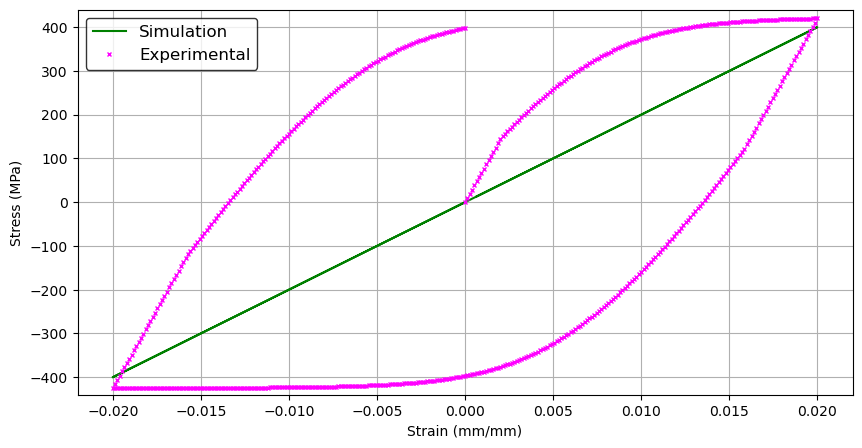

In [27]:
cli_instance.graph_e_and_sigma(dataframe = data_cli, 
                               input_data = "data/data_cyclique1_ex2.csv", 
                               savefig_name = "sim_results/cyclique_ex2.2_q4.png")

#### *Exercise 2 : Chargement cyclique - Q5*

5. Simulez l’essai avec un modèle de type écrouissage isotrope non linéaire : faites varier la limite d’élasticité, la constante de durcissement et le terme de rappel. Quel est le meilleur compromis que vous pouvez obtenir avec ce modèle ?

In [28]:
#########################################################################
### Simulation d'un essai cyclique - écrouissage isotrope non linéaire
#########################################################################

from src.code.models import lk

model_dict = {
  "material_property" : {
    "YoungModulus" : 20000,
    "PoissonRatio" : 0.3,
    "R0" : 1000,
    "Q" : 1000,
    "b" : 1.,
    "C[0]" : 0,
    "C[1]" : 0,
    'D_alpha[0]': 0,
    'D_alpha[1]': 0
  },
  "output" : {
    "filename" : "sim_results/cyclique_ex2.2_q5.txt"
  },
  "external_state_variable" : {
    "Temperature" : 293.15
  },
  "time" : {
    "start_time" : 0.0,
    "end_time" : 600,
    "step_time": 1
  },
  "load" : {
    "method" : "strain",
    "direction" : "EXX",
    "loading_blocks" : {
        4 : {
            "time" : 600,
            "load" : 0.0,
        },
        3 : {
            "time" : 450,
            "load" : -0.02,
        },
        2 : {
            "time" : 150,
            "load" : 0.02,
        },
        1 : {
            "time" : 0.0,
            "load" : 0.0,
        }
    }
  }
}

cnli_instance = lk(model_input_file = model_dict, 
                 behavior_name = 'asternonlinearisotropicnonlinearkinematic')
cnli_instance.print_input()
cnli_instance.run_simulation()
data_cnli = cnli_instance.print_output()

Input file loaded successfully.
Checking if all required fields are present...
{'external_state_variable': {'Temperature': 293.15},
 'load': {'direction': 'EXX',
          'loading_blocks': {1: {'load': 0.0, 'time': 0.0},
                             2: {'load': 0.02, 'time': 150},
                             3: {'load': -0.02, 'time': 450},
                             4: {'load': 0.0, 'time': 600}},
          'method': 'strain'},
 'material_property': {'C[0]': 0,
                       'C[1]': 0,
                       'D_alpha[0]': 0,
                       'D_alpha[1]': 0,
                       'PoissonRatio': 0.3,
                       'Q': 1000,
                       'R0': 1000,
                       'YoungModulus': 20000,
                       'b': 1.0},
 'output': {'filename': 'sim_results/cyclique_ex2.2_q5.txt'},
 'time': {'end_time': 600, 'start_time': 0.0, 'step_time': 1}}


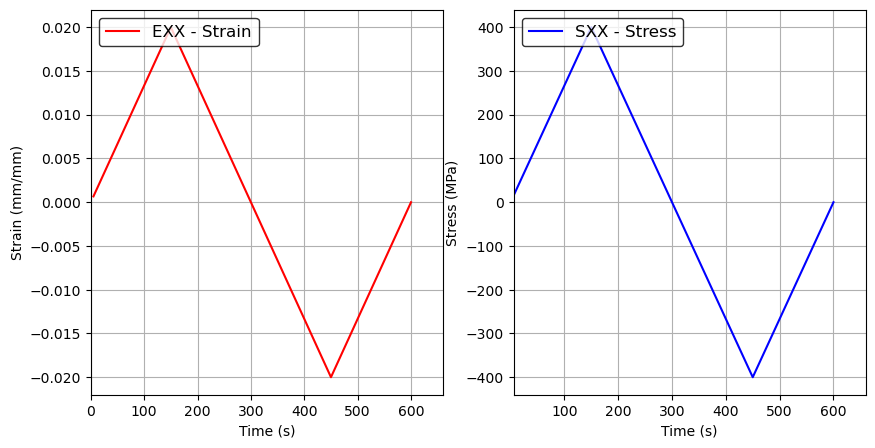

In [29]:
cnli_instance.graph_e_and_sigma_time(data_cnli)

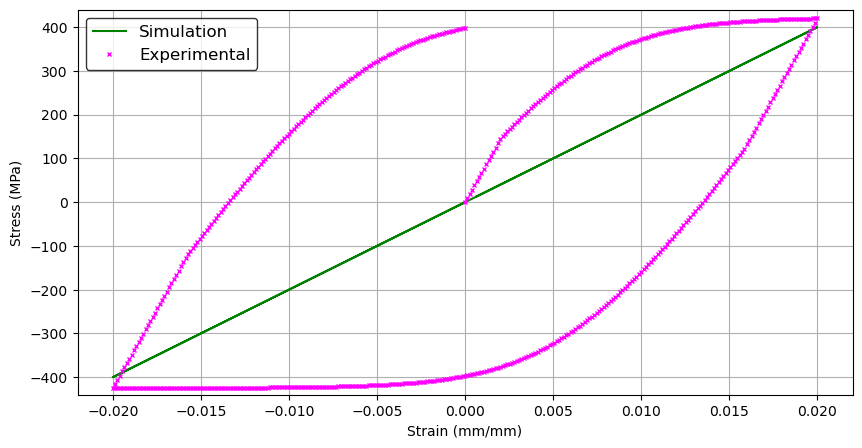

In [30]:
cnli_instance.graph_e_and_sigma(dataframe = data_cnli, 
                                input_data = "data/data_cyclique1_ex2.csv", 
                                savefig_name = "sim_results/cyclique_ex2.2_q5.png")

#### *Exercise 2 : Chargement cyclique - Q6*

6. À l’aide de vos premières observations, essayez de trouvez le meilleur compromis en mixant les écrouissages. Que pouvez-vous en conclure sur l’identification de paramètre à partir d’un essai de traction ?

***Hint - Vous pouvez même utiliser des modèle linéaires!***

In [31]:
#########################################################################
### Simulation d'un essai cyclique - écrouissage cinématique non linéaire
### combiné avec un écrouissage isotrope non linéaire
#########################################################################

from src.code.models import lk

model_dict = {
  "material_property" : {
    "YoungModulus" : 20000,
    "PoissonRatio" : 0.3,
    "R0" : 1000,
    "Q" : 1000,
    "b" : 1.,
    "C[0]" : 1000,
    "C[1]" : 0,
    'D_alpha[0]': 1000,
    'D_alpha[1]': 0
  },
  "output" : {
    "filename" : "sim_results/cyclique_ex2.2_q6.txt"
  },
  "external_state_variable" : {
    "Temperature" : 293.15
  },
  "time" : {
    "start_time" : 0.0,
    "end_time" : 600,
    "step_time": 1
  },
  "load" : {
    "method" : "strain",
    "direction" : "EXX",
    "loading_blocks" : {
        4 : {
            "time" : 600,
            "load" : 0.0,
        },
        3 : {
            "time" : 450,
            "load" : -0.02,
        },
        2 : {
            "time" : 150,
            "load" : 0.02,
        },
        1 : {
            "time" : 0.0,
            "load" : 0.0,
        }
    }
  }
}

cmixed_instance = lk(model_input_file = model_dict, 
                 behavior_name = 'asternonlinearisotropicnonlinearkinematic')
cmixed_instance.print_input()
cmixed_instance.run_simulation()
data_cmixed = cmixed_instance.print_output()

Input file loaded successfully.
Checking if all required fields are present...
{'external_state_variable': {'Temperature': 293.15},
 'load': {'direction': 'EXX',
          'loading_blocks': {1: {'load': 0.0, 'time': 0.0},
                             2: {'load': 0.02, 'time': 150},
                             3: {'load': -0.02, 'time': 450},
                             4: {'load': 0.0, 'time': 600}},
          'method': 'strain'},
 'material_property': {'C[0]': 1000,
                       'C[1]': 0,
                       'D_alpha[0]': 1000,
                       'D_alpha[1]': 0,
                       'PoissonRatio': 0.3,
                       'Q': 1000,
                       'R0': 1000,
                       'YoungModulus': 20000,
                       'b': 1.0},
 'output': {'filename': 'sim_results/cyclique_ex2.2_q6.txt'},
 'time': {'end_time': 600, 'start_time': 0.0, 'step_time': 1}}


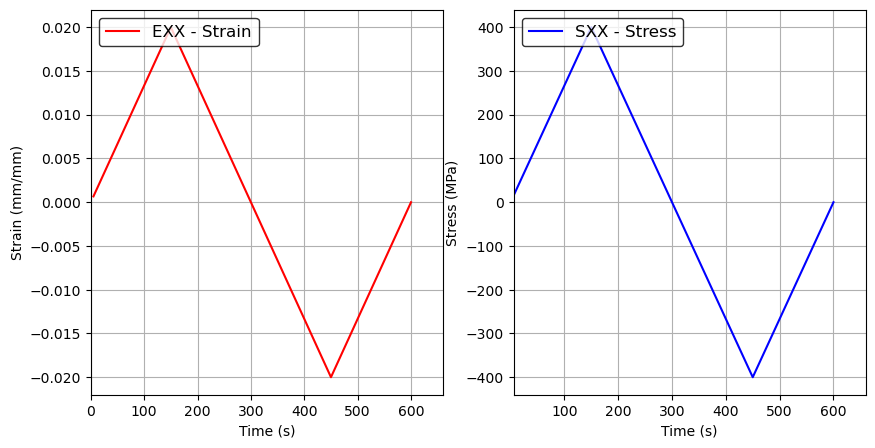

In [32]:
cmixed_instance.graph_e_and_sigma_time(data_cmixed)

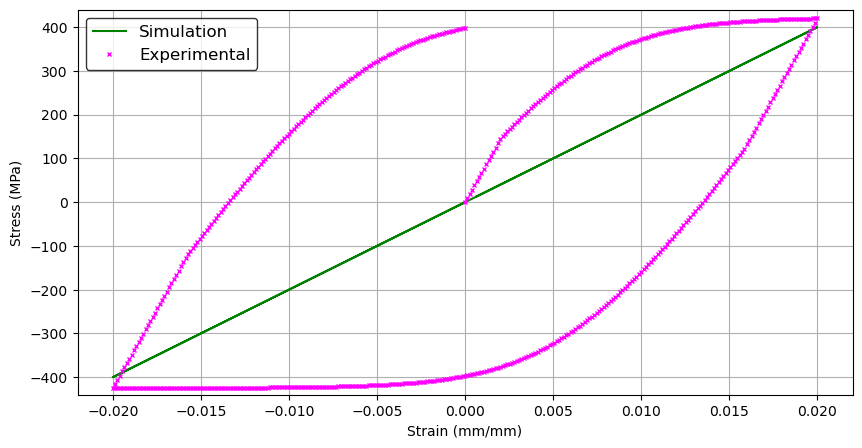

In [33]:
cmixed_instance.graph_e_and_sigma(dataframe = data_cmixed, 
                                  input_data = "data/data_cyclique1_ex2.csv", 
                                  savefig_name = "sim_results/cyclique_ex2.2_q6.png")

## **Exercice 3 - Corrélation calcul/essais en plasticité**

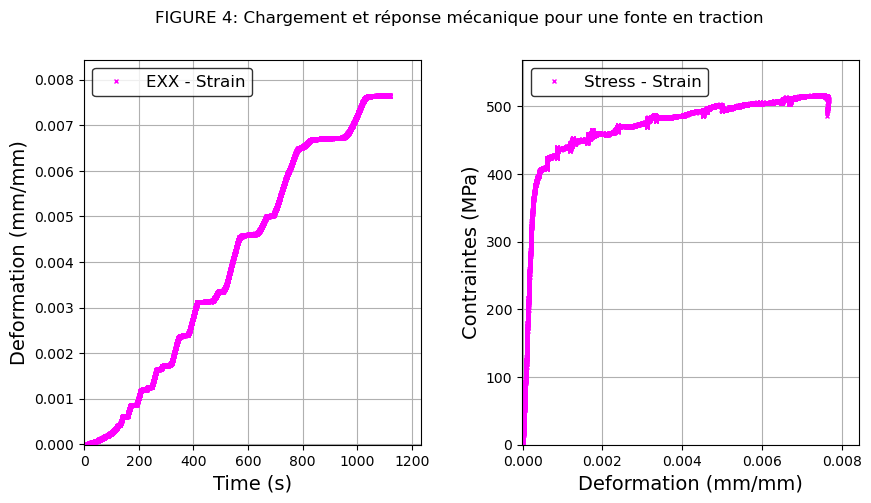

In [34]:
from src.code.functions import draw_data
draw_data(input_data = "data/data_traction1_ex3.csv", figure_title = 'FIGURE 4: Chargement et réponse mécanique pour une fonte en traction')

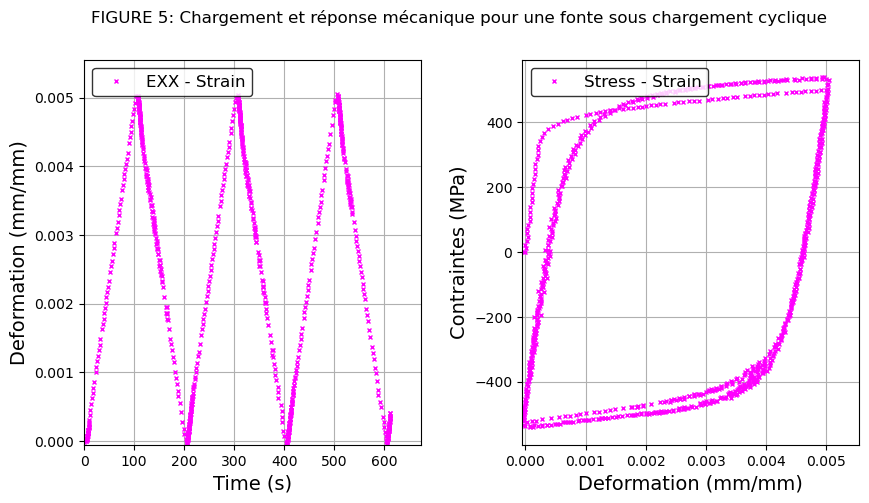

In [35]:
from src.code.functions import draw_data
draw_data(input_data = "data/data_cyclique1_ex3.csv", figure_title = 'FIGURE 5: Chargement et réponse mécanique pour une fonte sous chargement cyclique')

Il s’agit maintenant de mettre en pratique ce que vous avais appris de l’exercice 2 pour identifier un comportement sur des données expérimentales réelles. Ici, vous avez à votre disposition deux essais réalisés sur des éprouvettes en fonte.

En utilisant uniquement un modèle de plasticité, essayez de reproduire au mieux les deux essais.

### **Les questions**

1. Il s’agit tout d’abord d’un essai de traction pour lequel le pilotage en déformation est imparfait comme on peut le constater sur la Figure 4. Vous pouvez modéliser le chargement en le linéarisant l’évolution de a déformation en $\epsilon$ = $\epsilon_0$t.

2. Vous avez également à votre disposition un essai cyclique composé de **trois cycles successif de 200s chacun entre 0 et 0,005 mm/mm (Figure 5)** réalisé à vitesse constante comme présenté sur la Figure 4.

In [36]:
#########################################################################
### Simulation d'un essai de traction pour de la 
### fonte - écrouissage cinématique non linéaire combiné avec un 
### écrouissage isotrope non linéaire
#########################################################################

from src.code.models import lk

#########################################################################
### Variables globales à changer

young_modulus = 200000
poisson_ration = 0.3
R0 = 600
Q = 1000
b = 1
C_0 = 100
C_1 = 0
D_alpha_0 = 1000
D_alpha_1 = 0

#########################################################################

model_dict_traction = {
  "material_property" : {
    "YoungModulus" : young_modulus,
    "PoissonRatio" : poisson_ration,
    "R0" : R0,
    "Q" : Q,
    "b" : b,
    "C[0]" : C_0,
    "C[1]" : C_1,
    'D_alpha[0]': D_alpha_0,
    'D_alpha[1]': D_alpha_1
  },
  "output" : {
    "filename" : "sim_results/traction_ex3_q1.txt"
  },
  "external_state_variable" : {
    "Temperature" : 293.15
  },
  "time" : {
    "start_time" : 0.0,
    "end_time" : 1030,
    "step_time": 0.1
  },
  "load" : {
    "method" : "strain",
    "direction" : "EXX",
    "loading_blocks" : {
        2 : {
            "time" : 1030,
            "load" : 0.0076,
        },
        1 : {
            "time" : 0.0,
            "load" : 0.0,
        }
    }
  }
}

tmixedi_instance = lk(model_input_file = model_dict_traction, 
                 behavior_name = 'asternonlinearisotropicnonlinearkinematic')
tmixedi_instance.print_input()
tmixedi_instance.run_simulation()
data_tmixedi = tmixedi_instance.print_output()

#########################################################################
### Simulation d'un essai cyclique pour de la 
### fonte - écrouissage cinématique non linéaire combiné avec un 
### écrouissage isotrope non linéaire
#########################################################################

model_dict_cyclique = {
  "material_property" : {
    "YoungModulus" : young_modulus,
    "PoissonRatio" : poisson_ration,
    "R0" : R0,
    "Q" : Q,
    "b" : b,
    "C[0]" : C_0,
    "C[1]" : C_1,
    'D_alpha[0]': D_alpha_0,
    'D_alpha[1]': D_alpha_1
  },
  "output" : {
    "filename" : "sim_results/cyclique_ex3_q2.txt"
  },
  "external_state_variable" : {
    "Temperature" : 293.15
  },
  "time" : {
    "start_time" : 0.0,
    "end_time" : 1030,
    "step_time": 0.1
  },
  "load" : {
    "method" : "strain",
    "direction" : "EXX",
    "loading_blocks" : {
        7 : {
            "time" : 600,
            "load" : 0.005,
        },
        6 : {
            "time" : 500,
            "load" : 0.005,
        },
        5 : {
            "time" : 400,
            "load" : 0.0,
        },
        4 : {
            "time" : 300,
            "load" : 0.005,
        },
        3 : {
            "time" : 200,
            "load" : 0.0,
        },
        2 : {
            "time" : 100,
            "load" : 0.005,
        },
        1 : {
            "time" : 0.0,
            "load" : 0.0,
        }
    }
  }
}

cmixedi_instance = lk(model_input_file = model_dict_cyclique, 
                 behavior_name = 'asternonlinearisotropicnonlinearkinematic')
cmixedi_instance.print_input()
cmixedi_instance.run_simulation()
data_cmixedi = cmixedi_instance.print_output()

Input file loaded successfully.
Checking if all required fields are present...
{'external_state_variable': {'Temperature': 293.15},
 'load': {'direction': 'EXX',
          'loading_blocks': {1: {'load': 0.0, 'time': 0.0},
                             2: {'load': 0.0076, 'time': 1030}},
          'method': 'strain'},
 'material_property': {'C[0]': 100,
                       'C[1]': 0,
                       'D_alpha[0]': 1000,
                       'D_alpha[1]': 0,
                       'PoissonRatio': 0.3,
                       'Q': 1000,
                       'R0': 600,
                       'YoungModulus': 200000,
                       'b': 1},
 'output': {'filename': 'sim_results/traction_ex3_q1.txt'},
 'time': {'end_time': 1030, 'start_time': 0.0, 'step_time': 0.1}}
Input file loaded successfully.
Checking if all required fields are present...
{'external_state_variable': {'Temperature': 293.15},
 'load': {'direction': 'EXX',
          'loading_blocks': {1: {'load': 0.0, 'tim

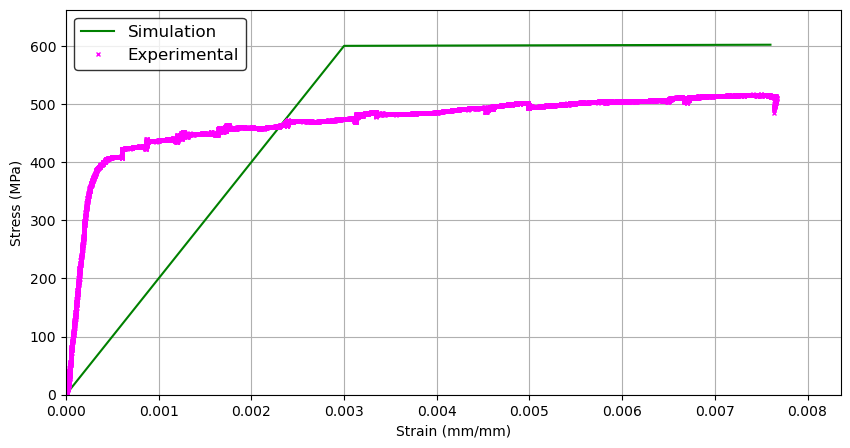

In [37]:
tmixedi_instance.graph_e_and_sigma(dataframe = data_tmixedi, 
                                   input_data = "data/data_traction1_ex3.csv", 
                                   savefig_name = "sim_results/traction_ex3_q1.png")

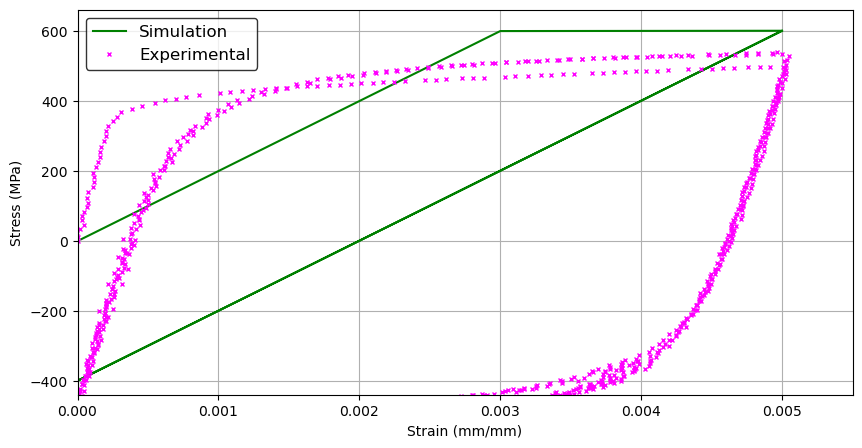

In [38]:
cmixedi_instance.graph_e_and_sigma(dataframe = data_cmixedi, 
                                   input_data = "data/data_cyclique1_ex3.csv", 
                                   savefig_name = "sim_results/cyclique_ex3_q2.png")

## **Exercice 4 - Corrélation calcul/essais en viscoplasticité**

<figure>
  <img
  src="src/image/figure-6.png"
  alt="The beautiful MDN logo." style="height:400px";>
  <figcaption>FIGURE 6: Chargement et réponse mécanique pour un alliage d aluminium sous chargement cyclique à 200°C</figcaption>
</figure>

Ici, vous avez à votre disposition un seul essai réalisé sur une éprouvette en alliage d’aluminium à la température de 200°C. Il s’agit d’un essai cyclique piloté en déformation où le même cycle est répété 10 fois avec à chaque fois un temps de maintien en déformation à déformation maximale. Ce temps de maintien induit une relaxation des contraintes avec le temps et implique la nécessité d’introduire de la viscosité dans le comportement. Nous allons utiliser un modèle de Chaboche. Le cycle est composé d’une traction entre 0 et 0,02 mm=mm en 40s suivi d’un maintien à cette déformation pendant 2620s, puis un déchargement jusque 0 mm=mm en 40 s suivi d’un nouveau maintien de 2620s.

En utilisant un modèle de vico-plasticité, essayez de reproduire au mieux les mesures expérimentales. Veillez surtout à correctement caler les paramètres K et n pour reproduire au mieux l’évolution de la contrainte en fonction du temps (voir l’amphi)

In [39]:
#########################################################################
### Simulation d'un essai cyclique - écrouissage cinématique non linéaire
### combiné avec un écrouissage isotrope non linéaire
#########################################################################

from src.code.models import lk

model_dict = {
  "material_property" : {
    "YoungModulus" : 201000,
    "PoissonRatio" : 0.3,
    "R0" : 180.,
    "Q" : 620,
    "b" : 10.,
    "C[0]" : 90000,
    "C[1]" : 0,
    'D_alpha[0]': 630.,
    'D_alpha[1]': 0,
    'm' : 7.5,
    'UNsurK' : 33.306
  },
  "output" : {
    "filename" : "sim_results/cyclique_ex4_q1.txt"
  },
  "external_state_variable" : {
    "Temperature" : 293.15
  },
  "time" : {
    "start_time" : 0.0,
    "end_time" : 53200,
    "step_time": 0.4
  },
  "load" : {
    "method" : "strain",
    "direction" : "EXX",
    "loading_blocks" : {
        41 : {"time" : 53200, "load" : 0.0, },
        40 : {"time" : 50580, "load" : 0.0, },
        39 : {"time" : 50540, "load" : 0.02,},
        38 : {"time" : 47920, "load" : 0.02,},
        37 : {"time" : 47880, "load" : 0.0, },
        36 : {"time" : 45260, "load" : 0.0, },
        35 : {"time" : 45220, "load" : 0.02,},
        34 : {"time" : 42600, "load" : 0.02,},
        33 : {"time" : 42560, "load" : 0.0, },
        32 : {"time" : 39940, "load" : 0.0, },
        31 : {"time" : 39900, "load" : 0.02,},
        30 : {"time" : 37280, "load" : 0.02,},
        29 : {"time" : 37240, "load" : 0.0, },
        28 : {"time" : 34620, "load" : 0.0, },
        27 : {"time" : 34580, "load" : 0.02,},
        26 : {"time" : 31960, "load" : 0.02,},
        25 : {"time" : 31920, "load" : 0.0, },
        24 : {"time" : 29300, "load" : 0.0, },
        23 : {"time" : 29260, "load" : 0.02,},
        22 : {"time" : 26640, "load" : 0.02,},
        21 : {"time" : 26600, "load" : 0.0, },
        20 : {"time" : 23980, "load" : 0.0, },
        19 : {"time" : 23940, "load" : 0.02,},
        18 : {"time" : 21320, "load" : 0.02,},
        17 : {"time" : 21280, "load" : 0.0, },
        16 : {"time" : 18660, "load" : 0.0, },
        15 : {"time" : 18620, "load" : 0.02,},
        14 : {"time" : 16000, "load" : 0.02,},
        13 : {"time" : 15960, "load" : 0.0, },
        12 : {"time" : 13340, "load" : 0.0, },
        11 : {"time" : 13300, "load" : 0.02,},
        10 : {"time" : 10680, "load" : 0.02,},
        9 : { "time" : 10640, "load" : 0.0, },
        8 : { "time" : 8020,  "load" : 0.0, },
        7 : {"time" : 7980,   "load" : 0.02,},
        6 : {"time" : 5360,   "load" : 0.02,},
        5 : {"time" : 5320,   "load" : 0.0, },
        4 : {"time" : 2720,   "load" : 0.0, },
        3 : {"time" : 2660,   "load" : 0.02,},
        2 : {"time" : 40,     "load" : 0.02,},
        1 : {"time" : 0.0,    "load" : 0.0,}
    }
  }
}

visco_instance = lk(model_input_file = model_dict, 
                 behavior_name = 'asternonlinearisotropicnonlinearkinematicviscosity')
visco_instance.print_input()
visco_instance.run_simulation()
data_visco = visco_instance.print_output()

Input file loaded successfully.
Checking if all required fields are present...
{'external_state_variable': {'Temperature': 293.15},
 'load': {'direction': 'EXX',
          'loading_blocks': {1: {'load': 0.0, 'time': 0.0},
                             2: {'load': 0.02, 'time': 40},
                             3: {'load': 0.02, 'time': 2660},
                             4: {'load': 0.0, 'time': 2720},
                             5: {'load': 0.0, 'time': 5320},
                             6: {'load': 0.02, 'time': 5360},
                             7: {'load': 0.02, 'time': 7980},
                             8: {'load': 0.0, 'time': 8020},
                             9: {'load': 0.0, 'time': 10640},
                             10: {'load': 0.02, 'time': 10680},
                             11: {'load': 0.02, 'time': 13300},
                             12: {'load': 0.0, 'time': 13340},
                             13: {'load': 0.0, 'time': 15960},
                             14: 

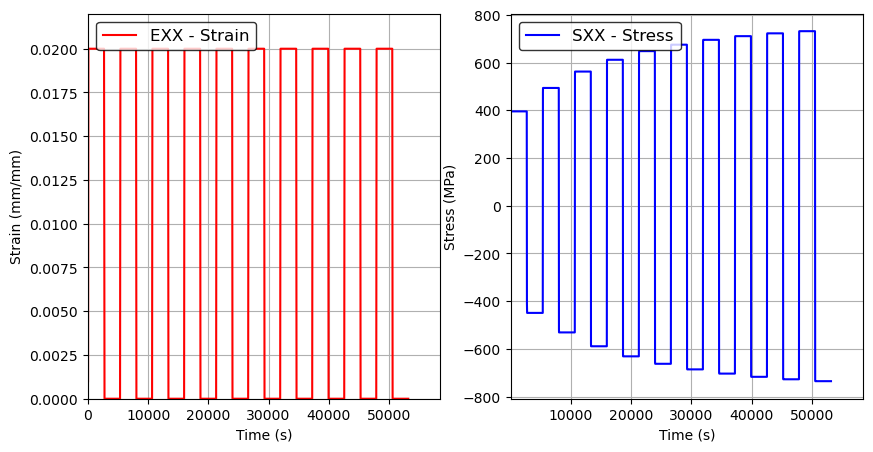

In [40]:
visco_instance.graph_e_and_sigma_time(data_visco)

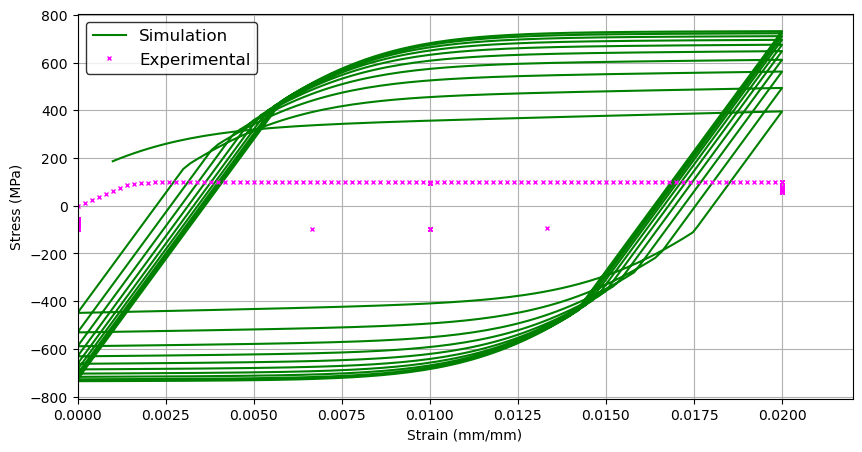

In [41]:
visco_instance.graph_e_and_sigma(dataframe = data_visco, 
                                 input_data = "data/data_cyclique1_ex4.csv", 
                                 savefig_name = "sim_results/cyclique_ex4_q1.png")